In [1]:
import numpy as np
np.random.seed(123)
from keras.datasets import mnist
import sys
from matplotlib import pyplot as plt

(x, y), (x_t, y_t) = mnist.load_data()

Using TensorFlow backend.


In [2]:
y_val = y[600:800]
x_val = x[600:800,:,:]
y = y[:600]
x = x[:600,:,:]
y_t = y_t[:200]
x_t = x_t[:200,:,:]

|Data|31700|60000|3000|6000|600|
|----|-----|-----|----|----|---|
|0s  | 3131| 5923| 285| 592| 58|
|1s  | 3616| 6742| 339| 671| 79|
|2s  | 3119| 5958| 299| 581| 64|
|3s  | 3238| 6131| 295| 608| 59|
|4s  | 3089| 5842| 325| 623| 59|
|5s  | 2851| 5421| 274| 514| 51|
|6s  | 3147| 5918| 306| 608| 54|
|7s  | 3289| 6265| 327| 651| 62|
|8s  | 3038| 5851| 261| 551| 49|
|9s  | 3182| 5949| 287| 601| 65|

In [3]:
def get_new_data_y(Y,y):
    a = 0
    s = len(y)
    for i in range(s):
        for j in range(s):
            Y[a] = y[i]*10 + y[j]
            a += 1
        sys.stdout.write('\r{0:.3f}% done'.format(i/(s/100)))

In [4]:
def get_new_data_x(X,x):
    l,m,n=x.shape
    p = 0
    for i in range(l):
        for j in range(l):
            X[p] = np.concatenate((x[i],x[j]),axis=1)
            p += 1
        sys.stdout.write('\r{0:.3f}% done'.format(i/(l/100)))

In [5]:
Y = np.zeros(len(y)*len(y),dtype='int8')
X = np.zeros((x.shape[0]*x.shape[0],x.shape[1],x.shape[2]*2),dtype='uint8')
Y_val = np.zeros(len(y_val)*len(y_val),dtype='int8')
X_val = np.zeros((x_val.shape[0]*x_val.shape[0],x_val.shape[1],x_val.shape[2]*2),dtype='uint8')
Y_t = np.zeros(len(y_t)*len(y_t),dtype='int8')
X_t = np.zeros((x_t.shape[0]*x_t.shape[0],x_t.shape[1],x_t.shape[2]*2),dtype='uint8')

In [6]:
get_new_data_y(Y,y)
get_new_data_y(Y_val,y_val)
get_new_data_y(Y_t,y_t)

get_new_data_x(X,x)
get_new_data_x(X_val,x_val)
get_new_data_x(X_t,x_t)

99.500% done

99.500% done

In [7]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

X = X.reshape(X.shape[0], 28, 56, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 56, 1)
X_t = X_t.reshape(X_t.shape[0], 28, 56, 1)

Y = np_utils.to_categorical(Y, 100)
Y_val = np_utils.to_categorical(Y_val, 100)
Y_t = np_utils.to_categorical(Y_t, 100)

In [8]:
model = Sequential()

model.add(Convolution2D(128, (3, 3), activation='relu', input_shape=(28,56,1), data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X, Y, epochs=10, verbose=1, validation_data=(X_val,Y_val))

Train on 360000 samples, validate on 40000 samples
Epoch 1/10
360000/360000 [==============================] - 136s 378us/step - loss: 0.2464 - acc: 0.9356 - val_loss: 0.7729 - val_acc: 0.8897
Epoch 2/10
360000/360000 [==============================] - 134s 373us/step - loss: 0.0905 - acc: 0.9879 - val_loss: 2.6034 - val_acc: 0.8072
Epoch 3/10
360000/360000 [==============================] - 134s 371us/step - loss: 0.2617 - acc: 0.9819 - val_loss: 2.4389 - val_acc: 0.8466
Epoch 4/10
360000/360000 [==============================] - 135s 375us/step - loss: 0.4768 - acc: 0.9697 - val_loss: 1.8550 - val_acc: 0.8838
Epoch 5/10
360000/360000 [==============================] - 135s 374us/step - loss: 0.6622 - acc: 0.9584 - val_loss: 2.3583 - val_acc: 0.8530
Epoch 6/10
360000/360000 [==============================] - 134s 373us/step - loss: 0.7725 - acc: 0.9517 - val_loss: 2.6682 - val_acc: 0.8341
Epoch 7/10
360000/360000 [==============================] - 134s 372us/step - loss: 1.0273 - acc:

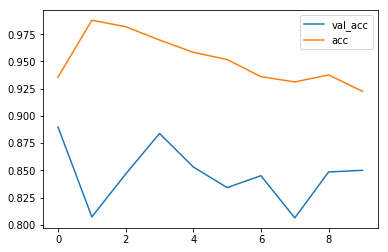

In [10]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['val_acc','acc'])

In [11]:
score = model.evaluate(X_t, Y_t, verbose=1)
print(score)

40000/40000 [==============================] - 7s 177us/step
[2.674001888888399, 0.83395]


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 54, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 27, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 25, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 12, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 10, 32)         18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
__________

In [ ]:
model.save(str(score[1])+".h5")